#NEURAL NETWORKS AND DEEP LEARNING
> M.Sc. ICT FOR LIFE AND HEALTH
> 
> Department of Information Engineering

> M.Sc. COMPUTER ENGINEERING
>
> Department of Information Engineering

> M.Sc. AUTOMATION ENGINEERING
>
> Department of Information Engineering
 
> M.Sc. PHYSICS OF DATA
>
> Department of Physics and Astronomy
 
> M.Sc. COGNITIVE NEUROSCIENCE AND CLINICAL NEUROPSYCHOLOGY
>
> Department of General Psychology

---
A.A. 2020/21 (6 CFU) - Dr. Alberto Testolin, Dr. Matteo Gadaleta
---


# Homework 1 - Supervised Deep Learning

## Simone Trevisan 1238612

# Classification task

## Dataset

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

Download the dataset:

In [ ]:
trs = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), 
                          torchvision.transforms.Normalize((0.1307,), (0.3081,))])
train_dataset = torchvision.datasets.MNIST('classifier_data', train=True, download=True, transform=trs)
test_dataset  = torchvision.datasets.MNIST('classifier_data', train=False, download=True, transform=trs)

Extracting classifier_data/MNIST/raw/train-images-idx3-ubyte.gz to classifier_data/MNIST/raw


Extracting classifier_data/MNIST/raw/train-labels-idx1-ubyte.gz to classifier_data/MNIST/raw



Extracting classifier_data/MNIST/raw/t10k-images-idx3-ubyte.gz to classifier_data/MNIST/raw


Extracting classifier_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to classifier_data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


How to get an image and the corresponding label:

SAMPLE AT INDEX 0
LABEL: 5


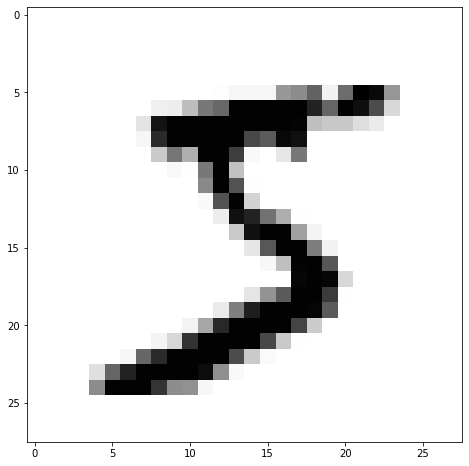

In [ ]:
sample_index = 0
image = train_dataset[sample_index][0]
label = train_dataset[sample_index][1]

fig = plt.figure(figsize=(8,8))
plt.imshow(np.squeeze(image), cmap='Greys')
print(f"SAMPLE AT INDEX {sample_index}")
print(f"LABEL: {label}")

## Data Augmentation

In [ ]:
# Data augmentation
trs2 = torchvision.transforms.Compose([torchvision.transforms.ToPILImage(mode=None), 
                           torchvision.transforms.RandomAffine(35, translate=(0.12,0.12), shear=5), 
                           torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.1307,), (0.3081,))])



In [ ]:
train_dataset,val_dataset = torch.utils.data.random_split(train_dataset,
                                [int(len(train_dataset)*0.8),int(len(train_dataset)*0.2)])

train_dataset_aug_x = [trs2(tensor[0]) for tensor in train_dataset]
train_dataset_aug_y = [tensor[1] for tensor in train_dataset]

train_dataset_x = [tensor[0] for tensor in train_dataset]



In [ ]:
train_dataset_x = torch.stack(train_dataset_x+train_dataset_aug_x)
train_dataset_y = torch.Tensor(train_dataset_aug_y+train_dataset_aug_y)

In [ ]:
train_dataset = torch.utils.data.TensorDataset(train_dataset_x,train_dataset_y)

## Model Definition

In [ ]:
#%% Neural Network

class Net(nn.Module):
    
    def __init__(self, Ni, Nh1, Nh2, Nh3, No):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, Nh1, 5, 1, padding=2)
        self.bn1 = nn.BatchNorm2d(Nh1)
        self.conv2 = nn.Conv2d(Nh1, Nh2, 5,1, padding=2)
        self.bn2 = nn.BatchNorm2d(Nh2)
        self.fc1 = nn.Linear(7*7*Nh2, Nh3)
        self.bn3 = nn.BatchNorm1d(Nh3)
        self.fc2 = nn.Linear(Nh3, No)
        
        
    def forward(self, x, additional_out=False):
        
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = self.bn1(x)
        x = F.dropout(x, p=0.3, training=self.training)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = self.bn2(x)
        x = F.dropout(x, p=0.3, training=self.training)
        x = x.view(-1, 7*7*Nh2)
        x = F.relu(self.fc1(x))
        x = self.bn3(x)
        x = F.dropout(x, p=0.3, training=self.training)
        x = self.fc2(x)
        
        
        if additional_out:
            return F.log_softmax(x, dim=1), x
        
        return F.log_softmax(x, dim=1)

In [ ]:
#%% Network initialization
        
Ni = 784
Nh1 = 32
Nh2 = 64
Nh3 = 1024
No = 10
net = Net(Ni, Nh1, Nh2 , Nh3, No)
device = torch.device("cuda")
net.cuda()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3136, out_features=1024, bias=True)
  (bn3): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
)

In [ ]:
from torchsummary import summary

summary(net, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             832
       BatchNorm2d-2           [-1, 32, 14, 14]              64
            Conv2d-3           [-1, 64, 14, 14]          51,264
       BatchNorm2d-4             [-1, 64, 7, 7]             128
            Linear-5                 [-1, 1024]       3,212,288
       BatchNorm1d-6                 [-1, 1024]           2,048
            Linear-7                   [-1, 10]          10,250
Total params: 3,276,874
Trainable params: 3,276,874
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.37
Params size (MB): 12.50
Estimated Total Size (MB): 12.88
----------------------------------------------------------------


## Training

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 64, shuffle = True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size = 1000, shuffle = False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 1000, shuffle = False)

In [ ]:
#%% Training
### 
train_loss_log = []
test_loss_log = []
conc_out = torch.Tensor().float()
conc_label = torch.Tensor().long()
conc_acc = torch.Tensor().float()
num_epochs = 50
lr = [1e-3, 1e-3, 1e-4, 1e-4, 1e-4, 1e-4] #1e-4
optimizer = torch.optim.Adam(net.parameters(), lr=lr[1])

In [ ]:

for num_epoch in range(50):
  print('Epoch', num_epoch + 1)
  # Training
  net.train() # Training mode (e.g. enable dropout)
  # Eventually clear previous recorded gradients
  optimizer.zero_grad()
  conc_out = torch.Tensor().float()
  conc_label = torch.Tensor().long()
  for batch_idx, (X_batch, y_batch) in enumerate(train_loader):
      input_train = Variable(X_batch).float()
      label_train = Variable(y_batch).long()
      input_train = input_train.to(device)
      label_train = label_train.to(device)
      optimizer.zero_grad()
      # Forward pass
      out = net(input_train)
      
      loss = F.nll_loss(out, label_train.squeeze())
      loss.backward()
      optimizer.step()
        
    # Total correct predictions
  correct = 0
  net.eval()
  for val_imgs, val_labels in val_loader:
        val_imgs = Variable(val_imgs).float()
        val_imgs = val_imgs.to(device)
        out_val = net(val_imgs)
        predicted = torch.max(out_val, 1)[1]
        val_labels = val_labels.to(device)
        correct += (predicted == val_labels.T).sum()

    
  accuracy = float(correct*100) / float(len(val_dataset))
  conc_acc = torch.cat((conc_acc,torch.Tensor([accuracy])),dim=0)

  print('Epoch : {} \tLoss: {:.6f}\t Accuracy:{:.3f}%'.format(
                num_epoch+1, 
                loss.data,
                float(correct*100) / float(len(val_dataset))))

conc_acc1 = conc_acc

Epoch 1
Epoch : 1 	Loss: 0.305155	 Accuracy:98.177%
Epoch 2
Epoch : 2 	Loss: 0.626697	 Accuracy:98.385%
Epoch 3
Epoch : 3 	Loss: 0.134187	 Accuracy:98.833%
Epoch 4
Epoch : 4 	Loss: 0.242462	 Accuracy:98.865%
Epoch 5
Epoch : 5 	Loss: 0.119159	 Accuracy:98.885%
Epoch 6
Epoch : 6 	Loss: 0.216650	 Accuracy:98.812%
Epoch 7
Epoch : 7 	Loss: 0.308122	 Accuracy:99.062%
Epoch 8
Epoch : 8 	Loss: 0.212404	 Accuracy:98.969%
Epoch 9
Epoch : 9 	Loss: 0.151389	 Accuracy:98.969%
Epoch 10
Epoch : 10 	Loss: 0.263566	 Accuracy:99.073%
Epoch 11
Epoch : 11 	Loss: 0.128836	 Accuracy:99.125%
Epoch 12
Epoch : 12 	Loss: 0.179080	 Accuracy:99.115%
Epoch 13
Epoch : 13 	Loss: 0.071985	 Accuracy:99.021%
Epoch 14
Epoch : 14 	Loss: 0.039684	 Accuracy:99.167%
Epoch 15
Epoch : 15 	Loss: 0.131856	 Accuracy:99.094%
Epoch 16
Epoch : 16 	Loss: 0.096685	 Accuracy:99.031%
Epoch 17
Epoch : 17 	Loss: 0.158847	 Accuracy:99.021%
Epoch 18
Epoch : 18 	Loss: 0.067145	 Accuracy:99.156%
Epoch 19
Epoch : 19 	Loss: 0.031349	 Accuracy:

No handles with labels found to put in legend.


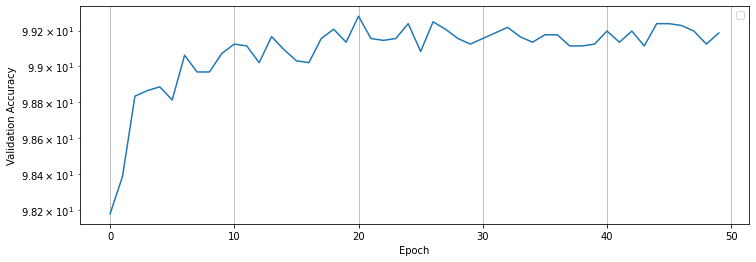

In [ ]:
plt.figure(figsize=(12,4))
plt.semilogy(conc_acc1)
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.grid()
plt.legend()
plt.show()

## Evaluation

In [ ]:
#%% Evaluation

def evaluate(model):
#model = mlp
    net.eval()
    correct = 0 
    for test_imgs, test_labels in test_loader:
        #print(test_imgs.shape)  
        test_imgs = Variable(test_imgs).float()
        test_imgs = test_imgs.to(device)
        output = model(test_imgs)
        predicted = torch.max(output,1)[1]
        test_labels = test_labels.to(device)
        correct += (predicted == test_labels.T.long()).sum()
        #return test_imgs
    print("Test accuracy:{:.3f}% ".format( float(correct)*100 / (len(test_dataset))))
    print(correct)
xxx=evaluate(net)

Test accuracy:99.320% 
tensor(9932, device='cuda:0')


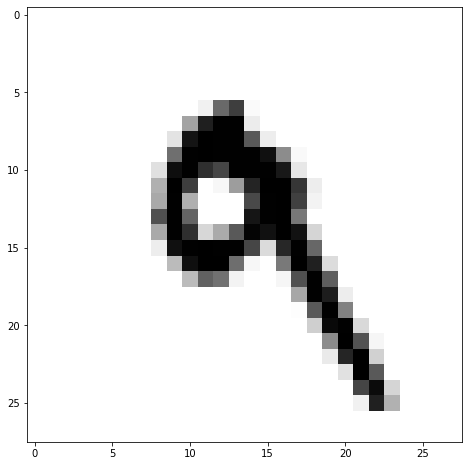

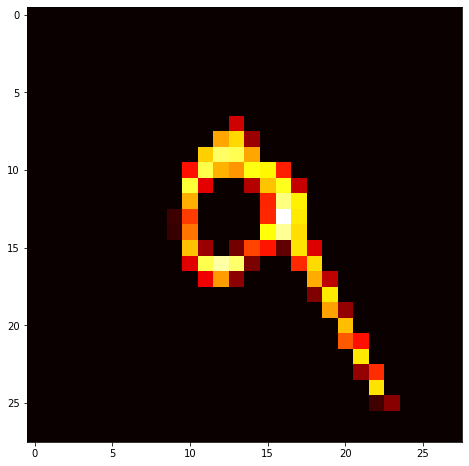

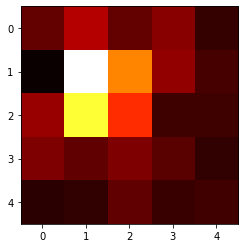

In [ ]:
activation = {}
def get_activation(layer, input, output):
    global activation
    activation = torch.relu(output)

### Register hook  

net.eval()
hook_handle = net.conv1.register_forward_hook(get_activation)


image1 = test_dataset[7][0]
label1 = test_dataset[7][1]
x1 = image1.to(device)
y1 = net(x1.unsqueeze(0))
z1 = activation

hook_handle.remove()

fig = plt.figure(figsize=(8,8))
plt.imshow(np.squeeze(image1).cpu(), cmap='gray_r')

h1_w = net.conv1.weight.data.cpu().numpy()
i = 23
fig = plt.figure(figsize=(8,8))
plt.imshow(np.squeeze(z1).cpu().clone().detach().numpy()[i], cmap='hot')
fig = plt.figure(figsize=(4,4))
plt.imshow(np.squeeze(h1_w[i]), cmap='hot')
